In [1]:
import numpy as np
from scenarios import *
import matplotlib.pyplot as plt

In [2]:
scenarios = Scenarios()
scenario = "treasure_hunt" # "reach_avoid", "narrow_maze", "treasure_hunt"
objects = scenarios.get_objects(scenario)
x0 = scenarios.get_starting_state(scenario)

In [3]:
objects

{'door_key': (3.75, 4.75, 3.75, 4.75, 1.0, 2.0),
 'chest': (-4.25, -3, -4.5, -3.75, 0.0, 0.75),
 'door': (0.0, 0.5, -2.5, -1, 0.0, 2.5),
 'region_bounds': (-5.0, 5.0, -5.0, 5.0, 0.0, 3.0),
 'NE_inside_wall': (2.0, 5.0, 3.0, 3.5, 0.0, 3.0),
 'south_mid_inside_wall': (0.0, 0.5, -5.0, -2.5, 0.0, 3.0),
 'north_mid_inside_wall': (0.0, 0.5, -1.0, 5.0, 0.0, 3.0),
 'west_inside_wall': (-2.25, -1.75, -5.0, 3.5, 0.0, 3.0),
 'above_door_wall': (0.0, 0.5, -2.5, -1, 2.5, 3.0)}

In [4]:
# open x from a file
x = np.load('data.npy')[0]
x.shape

(6, 51)

In [5]:
# function to check if a point is inside an object
def is_inside(point, object):
    x, y, z = point[:3]
    xmin, xmax, ymin, ymax, zmin, zmax = object
    inside_boolean = x >= xmin and x <= xmax and y >= ymin and y <= ymax and z >= zmin and z <= zmax
    return inside_boolean*1

In [6]:
# array with all the points and the objects they are inside
T = x.shape[1]
N = len(objects)
inside_array = np.zeros((N,T))
for i, object in enumerate(objects.values()):
    for j in range(T):
        inside_array[i,j] = is_inside(x[:3,j], object)

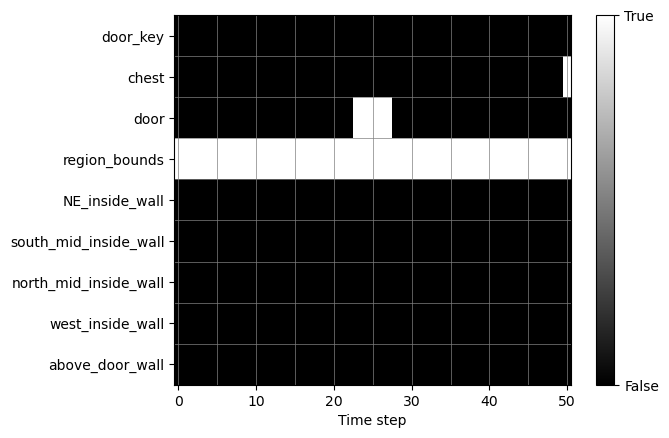

In [26]:
# Show black and white image of the points inside the objects
plt.imshow(inside_array, aspect='auto', cmap='gray')
plt.xlabel('Time step')
plt.yticks(range(N), objects.keys())

cbar = plt.colorbar()
cbar.set_ticks([0., 1.])
cbar.set_ticklabels(['False', 'True'])

#show lines between the objects
for i in range(N-1):
     plt.axhline(i+0.5, color='gray', linewidth=0.5)
# show vertical lines for every 5 time steps
for i in range(0,T,5):
    plt.axvline(i, color='gray', linewidth=0.5)

plt.show()